In [3]:
# Imports
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import re
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

# Data Ingestion and Understanding

In [4]:
# Read data
df_srx = pd.read_excel("Data/df_srx_new.xlsx")

In [5]:
df_srx.isnull().sum()

Unnamed: 0                9999
PSF                       2303
Property Name             2296
Bathrooms                 3080
Tenure                    2411
Model                     3778
No. of Units              2643
District                  2296
Take Over                 2296
Property Type             2296
Lease Term                2296
Room Type                 2296
Address                   2296
Available from            6941
Size                      2296
Date Listed               2296
Floor Level               9407
Utility Amount            9987
Bedrooms                  3312
Developer                 2772
Built Year                2967
Furnish                   6430
Asking                    2302
HDB Town                  9999
TOP                       9840
Bus Stops                 3322
Primary Schools           2431
Groceries & Supermarts    2303
Shopping Malls            2340
Trains (MRT & LRT)        2345
dtype: int64

In [6]:
df_srx.dtypes

Unnamed: 0                float64
PSF                        object
Property Name              object
Bathrooms                 float64
Tenure                     object
Model                      object
No. of Units              float64
District                   object
Take Over                  object
Property Type              object
Lease Term                 object
Room Type                  object
Address                    object
Available from             object
Size                       object
Date Listed               float64
Floor Level                object
Utility Amount             object
Bedrooms                   object
Developer                  object
Built Year                float64
Furnish                    object
Asking                     object
HDB Town                  float64
TOP                       float64
Bus Stops                  object
Primary Schools            object
Groceries & Supermarts     object
Shopping Malls             object
Trains (MRT & 

# Data Cleaning

In [7]:
# Remove completely empty rows
print(f'Original: {len(df_srx)}')
df_srx = df_srx.dropna(how="all")
print(f'df_srx: {len(df_srx)}')

Original: 9999
df_srx: 7703


In [8]:
df_srx.isnull().sum()

Unnamed: 0                7703
PSF                          7
Property Name                0
Bathrooms                  784
Tenure                     115
Model                     1482
No. of Units               347
District                     0
Take Over                    0
Property Type                0
Lease Term                   0
Room Type                    0
Address                      0
Available from            4645
Size                         0
Date Listed                  0
Floor Level               7111
Utility Amount            7691
Bedrooms                  1016
Developer                  476
Built Year                 671
Furnish                   4134
Asking                       6
HDB Town                  7703
TOP                       7544
Bus Stops                 1026
Primary Schools            135
Groceries & Supermarts       7
Shopping Malls              44
Trains (MRT & LRT)          49
dtype: int64

In [9]:
# Remove duplicates
df_srx = df_srx.drop_duplicates()

print(f'df_srx: {len(df_srx)}')

df_srx: 7703


In [10]:
df_srx = df_srx.replace(to_replace=r'\t', value='', regex=True)
df_srx['Available from'] = df_srx['Available from'].replace(to_replace=[np.nan,',Now'], value=datetime.now().date(), regex=True)
df_srx['Available from'] = df_srx['Available from'].apply(lambda x: pd.to_datetime(x).date())
#Keep Available From before today
df_srx = df_srx[df_srx['Available from'] <= datetime.now().date()]
print(f'df_srx: {len(df_srx)}')

df_srx: 6930


In [11]:
#Has property type
df_srx = df_srx[pd.notnull(df_srx['Property Type'])]
print(f'df_srx: {len(df_srx)}')

df_srx: 6930


In [12]:
# Remove 3 empty date listed rows
df_srx = df_srx[df_srx['Date Listed'].notna()]

In [13]:
# Remove unnecessary columns 
df_srx = df_srx.drop(['Utility Amount', 'Available from', 'PSF', 'TOP', 'Floor Level', 'Furnish', 'Take Over', 'Bus Stops'], axis=1)

**Tenure**

In [14]:
df_srx["Tenure"].value_counts()

LEASEHOLD/99 years           3812
FREEHOLD                     2572
999 years                     198
LEASEHOLD/103 years           100
110 Years from 01/11/2017      66
929 Years from 01/01/1953      15
956 Years from 27/05/1928      14
100 Years from 01/02/1986      10
LEASEHOLD/60 years              8
947 Years from 15/05/1937       8
Freehold                        4
N.A                             2
99 Years from 07/03/2018        1
99 Years from 28/08/2013        1
947 Years from 05/10/1934       1
998 Years from 12/10/1885       1
99 Years from 22/03/2012        1
946 Years from 23/06/1938       1
99 Years from 14/08/2018        1
103 Years from 01/10/2010       1
Name: Tenure, dtype: int64

In [15]:
df_srx["Tenure"] = df_srx["Tenure"].replace(np.nan, 99)
df_srx["Tenure"] = df_srx["Tenure"].replace('N.A', 99)

In [16]:
df_srx["Tenure"] = df_srx["Tenure"].apply(lambda x: str(x).lower().replace('leasehold/',''))
df_srx["Tenure"] = df_srx["Tenure"].apply(lambda x: re.sub('years.*','', x))
df_srx["Tenure"] = df_srx["Tenure"].apply(lambda x: 999 if x.find("freehold") > -1 else int(x))

In [17]:
df_srx["Tenure"].value_counts()

99     3931
999    2774
103     101
110      66
929      15
956      14
100      10
947       9
60        8
998       1
946       1
Name: Tenure, dtype: int64

In [18]:
# Or only two categories: Leasehold and freehold
# df_srx["Tenure"] = df_srx["Tenure"].replace(np.nan, "Leasehold")
# df_srx["Tenure"] = df_srx["Tenure"].apply(lambda x: "Freehold" if x.find("freehold") > -1 or x.find("999") > -1 else "Non-freehold")

**District**

In [19]:
df_srx["District"].value_counts()

D9 - Orchard / River Valley                          952
D10 - Tanglin / Holland / Bukit Timah                883
D14 - Eunos / Geylang / Paya Lebar                   489
D19 - Hougang / Punggol / Sengkang                   385
D15 - East Coast / Marine Parade                     372
D1 - Boat Quay / Raffles Place / Marina              323
D3 - Alexandra / Commonwealth                        312
D18 - Pasir Ris / Tampines                           295
D5 - Buona Vista / West Coast / Clementi New Town    279
D20 - Ang Mo Kio / Bishan / Thomson                  251
D21 - Clementi Park / Upper Bukit Timah              244
D11 - Newton / Novena                                241
D23 - Dairy Farm / Bukit Panjang / Choa Chu Kang     210
D22 - Boon Lay / Jurong / Tuas                       189
D16 - Bedok / Upper East Coast                       187
D13 - Macpherson / Potong Pasir                      180
D12 - Balestier / Toa Payoh                          171
D4 - Sentosa / Harbourfront    

In [20]:
null_districts_with_towns = df_srx[df_srx['District'].isna()]['HDB Town']
unique_towns = null_districts_with_towns.unique()
unique_towns

array([], dtype=float64)

In [21]:
df_srx["District"] = df_srx["District"].fillna("NULL")
for town in unique_towns:
    avail_districts = df_srx["District"][df_srx["District"].str.contains(town)]
    if avail_districts.empty:
      pass
    else:
      df_srx.loc[df_srx["HDB Town"] == town, ["District"]] = avail_districts.iloc[0]

In [22]:
df_srx.loc[df_srx["District"]=="NULL"]["HDB Town"].unique()

array([], dtype=float64)

In [23]:
# Manually replace NaN values in District column based on info from external resources
df_srx.loc[df_srx['HDB Town'] == 'Jurong West', ["District"]] = 'D22'
df_srx.loc[df_srx['HDB Town'] == 'Jurong East', ["District"]] = 'D22'
df_srx.loc[df_srx['HDB Town'] == 'Bukit Batok', ["District"]] = 'D21'
df_srx.loc[df_srx['HDB Town'] == 'Kallang/Whampoa', ["District"]] = 'D11'
df_srx.loc[df_srx['HDB Town'] == 'Queenstown', ["District"]] = 'D3'
df_srx.loc[df_srx['HDB Town'] == 'Bukit Merah', ["District"]] = 'D3'
df_srx.loc[df_srx['HDB Town'] == 'Central Area', ["District"]] = 'D1'

In [24]:
df_srx["District"].value_counts()

D9 - Orchard / River Valley                          952
D10 - Tanglin / Holland / Bukit Timah                883
D14 - Eunos / Geylang / Paya Lebar                   489
D19 - Hougang / Punggol / Sengkang                   385
D15 - East Coast / Marine Parade                     372
D1 - Boat Quay / Raffles Place / Marina              323
D3 - Alexandra / Commonwealth                        312
D18 - Pasir Ris / Tampines                           295
D5 - Buona Vista / West Coast / Clementi New Town    279
D20 - Ang Mo Kio / Bishan / Thomson                  251
D21 - Clementi Park / Upper Bukit Timah              244
D11 - Newton / Novena                                241
D23 - Dairy Farm / Bukit Panjang / Choa Chu Kang     210
D22 - Boon Lay / Jurong / Tuas                       189
D16 - Bedok / Upper East Coast                       187
D13 - Macpherson / Potong Pasir                      180
D12 - Balestier / Toa Payoh                          171
D4 - Sentosa / Harbourfront    

In [25]:
df_srx["District"] = df_srx["District"].apply(lambda x: re.sub(' -.*','',str(x)))

In [26]:
df_srx["District"].value_counts()

D9     952
D10    883
D14    489
D19    385
D15    372
D1     323
D3     312
D18    295
D5     279
D20    251
D21    244
D11    241
D23    210
D22    189
D16    187
D13    180
D12    171
D4     171
D2     168
D27    125
D8     116
D17    116
D7      94
D25     85
D28     67
D26     19
D6       6
Name: District, dtype: int64

In [27]:
# Remove unnecessary HDB Town column 
df_srx = df_srx.drop(['HDB Town'], axis=1)

**Size**

In [28]:
df_srx["Size"].value_counts()

200 sqft (Built-up)      186
150 sqft (Built-up)      176
100 sqft (Built-up)      149
689 sqft (Built-up)      104
764 sqft (Built-up)      104
                        ... 
626 sqft (Built-up)        1
4,962 sqft (Built-up)      1
2,853 sqft (Built-up)      1
5,285 sqft (Built-up)      1
88 sqft (Built-up)         1
Name: Size, Length: 833, dtype: int64

In [29]:
df_srx[df_srx["Size"].isnull()]

,Unnamed: 0,Property Name,Bathrooms,Tenure,Model,No. of Units,District,Property Type,Lease Term,Room Type,...,Size,Date Listed,Bedrooms,Developer,Built Year,Asking,Primary Schools,Groceries & Supermarts,Shopping Malls,Trains (MRT & LRT)


In [30]:
# 1 sqm = 10.764 sqft
df_srx["Size"] = df_srx["Size"].fillna(0)
df_srx["Size"] = df_srx["Size"].apply(lambda x: str(x).replace(',', ''))
df_srx["Size"] = df_srx["Size"].apply(lambda x: int(x.split(' ')[0]) if x.find('sqft') > -1 else int(x.split(' ')[0])*10.764)

In [31]:
df_srx['Property Type'].value_counts()

Condominium    3996
Apartment      2934
Name: Property Type, dtype: int64

In [32]:
pd.cut(df_srx["Size"], np.arange(0, 90000, 10000)).value_counts()

(0, 10000]        6929
(10000, 20000]       0
(20000, 30000]       0
(30000, 40000]       0
(40000, 50000]       0
(50000, 60000]       0
(60000, 70000]       0
(70000, 80000]       0
Name: Size, dtype: int64

In [33]:
big = df_srx[df_srx["Size"] > 20000]
big

,Unnamed: 0,Property Name,Bathrooms,Tenure,Model,No. of Units,District,Property Type,Lease Term,Room Type,...,Size,Date Listed,Bedrooms,Developer,Built Year,Asking,Primary Schools,Groceries & Supermarts,Shopping Malls,Trains (MRT & LRT)
9729,NaN,Tenet,2.0,99,Executive Condominium,618.0,D18,Condominium,Flexible,Entire Unit,...,1121997,1.678800e+09,3,TQS Development Pte Ltd,NaN,$893,"Elias Park Primary,0.74 km;Park View Primary,1...","NTUC Fairprice (Whitesands),0.92 km;Sheng Sion...","White Sands,0.92 km;Elias Mall,1.14 km;Pasir R...","TAMPINES NORTH MRT DUE 2029,CR6;PASIR RIS MRT,..."


In [34]:
# Remove outlier of size 70,000+ sqft
df_srx = df_srx[df_srx["Size"] < 30000]

**Bedrooms**

In [35]:
df_srx["Bedrooms"].value_counts()

2         1703
3         1541
1         1349
4          617
Studio     182
3+1        160
4+1        121
1+1        102
2+1         93
5           76
6           13
5+1          9
4+2          3
Name: Bedrooms, dtype: int64

In [36]:
df_srx["Bedrooms"] = df_srx["Bedrooms"].fillna(0)
df_srx.loc[df_srx["Bedrooms"]=="Studio"] = 1
df_srx.loc[df_srx["Bedrooms"]=="10+"] = 10
df_srx["Bedrooms"] = df_srx["Bedrooms"].astype('str').apply(lambda x: int(x[0])+1 if x.find("+") > -1 else int(x) if len(x)<3 else 0)

In [37]:
df_srx["Bedrooms"].value_counts()

2    1805
3    1634
1    1531
0     960
4     777
5     200
6      22
Name: Bedrooms, dtype: int64

**Bathrooms**

In [38]:
df_srx["Bathrooms"].value_counts()

2.0    2173
1.0    2171
3.0    1193
4.0     467
5.0     151
6.0      32
7.0       4
Name: Bathrooms, dtype: int64

In [39]:
df_srx["Bathrooms"] = df_srx["Bathrooms"].fillna(0)
df_srx.loc[df_srx["Bathrooms"] > 10] = 0
df_srx["Bathrooms"] = df_srx["Bathrooms"].astype(int)

In [40]:
df_srx["Bathrooms"].value_counts()

2    2173
1    2171
3    1193
0     738
4     467
5     151
6      32
7       4
Name: Bathrooms, dtype: int64

**Furnish**

In [41]:
# df_srx["Furnish"].value_counts()

In [42]:
# df_srx["Furnish"] = df_srx["Furnish"].apply(lambda x: "Unknown" if str(x) in ("0", "1", "10", "nan") else str(x))

In [43]:
# df_srx["Furnish"].value_counts()

**Property Type**

In [44]:
df_srx['Property Type'].unique()

array(['Condominium', 'Apartment', 1], dtype=object)

In [45]:
df_srx['Property'] = df_srx['Property Type'].apply(lambda x: 'HDB' if 'HDB' in str(x) else 'Condominium' if 'Condo' in str(x) else np.nan)

In [46]:
df_srx['Property'].value_counts()

Condominium    3886
Name: Property, dtype: int64

In [47]:
#Only keep condo & hdb
df_srx = df_srx[pd.notnull(df_srx['Property'])]

**Asking**

In [48]:
def findPrice(x):
    if str(x) == 'nan':
        return np.nan
    price = re.findall(r'\d+\,\d+',x)
    if len(price) == 0:
        return np.nan
    else:
        return int(re.sub(',','',price[0]))

In [49]:
df_srx['Asking'] = df_srx['Asking'].apply(findPrice)

In [50]:
#Remove those have same posting info but the price are different; take an average
srx = df_srx.groupby([ 'Property Name',  'Address']).aggregate({'Asking':'mean'}).reset_index()
df_srx = pd.merge(df_srx.drop(['Asking'], axis=1), srx.drop_duplicates(), on = [ 'Property Name',  'Address'], how="inner")

In [51]:
df_srx.shape

(3886, 22)

**Built Year**

<AxesSubplot: xlabel='Property', ylabel='Built Year'>

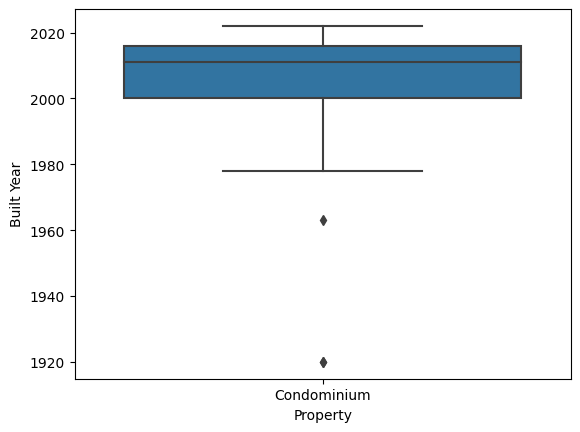

In [52]:
df_srx['Built Year'] = df_srx['Built Year'].astype(float)
sns.boxplot(y="Built Year", x="Property", data=df_srx)

In [53]:
df_srx['Built Year']

0       2022.0
1       2022.0
2       2022.0
3       2022.0
4       2022.0
         ...  
3881    2014.0
3882    1997.0
3883    2011.0
3884    2013.0
3885    2013.0
Name: Built Year, Length: 3886, dtype: float64

In [54]:
#Imputation HDB nan as mean
# print(df_srx['Built Year'][df_srx['Property'] == 'HDB'].describe())
# df_srx['Built Year'][(df_srx['Property'] == 'HDB') & pd.isnull(df_srx['Built Year'])] = 1992

In [55]:
#Imputation Condo nan as mean
print(df_srx['Built Year'][df_srx['Property'] == 'Condominium'].describe())
df_srx['Built Year'][(df_srx['Property'] == 'Condominium') & pd.isnull(df_srx['Built Year'])]  = 2008

count    3649.000000
mean     2008.110715
std        10.597362
min      1920.000000
25%      2000.000000
50%      2011.000000
75%      2016.000000
max      2022.000000
Name: Built Year, dtype: float64


In [56]:
df_srx['Built Year'] = df_srx['Built Year'].astype(int)

**Primary Schools, Groceries & Supermarts, Shopping Malls**

In [57]:
def findKM(x):
    if str(x) == 'nan':
        return np.nan
    return min([float(s) for s in re.findall(r'\d+\.\d+', x)])

In [58]:
df_srx['Shopping Malls'] = df_srx['Shopping Malls'].apply(findKM)
df_srx['Primary Schools'] = df_srx['Primary Schools'].apply(findKM)
df_srx['Groceries & Supermarts'] = df_srx['Groceries & Supermarts'].apply(findKM)

In [59]:
#Imputation nan as 1km
df_srx['Primary Schools'][pd.isnull(df_srx['Primary Schools'])] = 1
df_srx['Shopping Malls'][pd.isnull(df_srx['Shopping Malls'])] = 1
df_srx['Groceries & Supermarts'][pd.isnull(df_srx['Groceries & Supermarts'])] = 1

**Date listed**

In [60]:
df_srx['Date Listed'] = df_srx['Date Listed'].apply(lambda x: datetime.fromtimestamp(x))

**MRT**

In [61]:
def findFirstMRT(x):
  if str(x) == "nan":
    return ""
  mrts = x.split(";")
  final = []
  for mrt in mrts:
    if "DUE" not in mrt:
      final.append(mrt)
  return final[0] if len(final) !=0 else ""

In [62]:
df_srx['Trains (MRT & LRT)'] = df_srx['Trains (MRT & LRT)'].apply(findFirstMRT)

**No. of units**

In [63]:
df_srx.columns

Index(['Unnamed: 0', 'Property Name', 'Bathrooms', 'Tenure', 'Model',
       'No. of Units', 'District', 'Property Type', 'Lease Term', 'Room Type',
       'Address', 'Size', 'Date Listed', 'Bedrooms', 'Developer', 'Built Year',
       'Primary Schools', 'Groceries & Supermarts', 'Shopping Malls',
       'Trains (MRT & LRT)', 'Property', 'Asking'],
      dtype='object')

In [64]:
df_srx['Neighborhood'] = df_srx['No. of Units'].apply(lambda x: "Small" if x<=450 else "Big")

**Imputation - Bathrooms**

In [65]:
df_srx.isnull().sum()

Unnamed: 0                3886
Property Name                0
Bathrooms                    0
Tenure                       0
Model                      659
No. of Units               220
District                     0
Property Type                0
Lease Term                   0
Room Type                    0
Address                      0
Size                         0
Date Listed                  0
Bedrooms                     0
Developer                  142
Built Year                   0
Primary Schools              0
Groceries & Supermarts       0
Shopping Malls               0
Trains (MRT & LRT)           0
Property                     0
Asking                       6
Neighborhood                 0
dtype: int64

In [66]:
# Find max size of flats that require bathroom imputation
df_srx[df_srx["Bathrooms"]==0]["Size"].max()

4000

In [67]:
df_srx["Bathrooms"] = df_srx["Bathrooms"].replace(0, np.nan)

In [68]:
total_bins = pd.cut(df_srx["Size"], np.arange(0, 30000, 400)) 
bath = df_srx.groupby(pd.cut(df_srx["Size"], np.arange(0, 12000, 400)) ).median()["Bathrooms"]

In [69]:
df_srx["Bathrooms"] = df_srx["Bathrooms"].fillna(total_bins.replace(bath))

In [70]:
df_srx["Bathrooms"].value_counts()

1.0    1303
2.0    1210
3.0     897
4.0     339
5.0     111
6.0      23
7.0       3
Name: Bathrooms, dtype: int64

**Imputation - Bedrooms**

In [71]:
# Find max size of flats that require bedroom imputation
df_srx[df_srx["Bedrooms"]==0]["Size"].max()

2000

In [72]:
df_srx["Bedrooms"] = df_srx["Bedrooms"].replace(0, np.nan)

In [73]:
bed = df_srx.groupby(pd.cut(df_srx["Size"], np.arange(0, 13000, 400))).median()["Bedrooms"]
bed

Size
(0, 400]          1.0
(400, 800]        2.0
(800, 1200]       3.0
(1200, 1600]      3.0
(1600, 2000]      3.0
(2000, 2400]      4.0
(2400, 2800]      4.0
(2800, 3200]      4.0
(3200, 3600]      4.0
(3600, 4000]      4.0
(4000, 4400]      5.0
(4400, 4800]      5.0
(4800, 5200]      5.0
(5200, 5600]      5.0
(5600, 6000]      5.0
(6000, 6400]      5.0
(6400, 6800]      NaN
(6800, 7200]      5.0
(7200, 7600]      NaN
(7600, 8000]      4.0
(8000, 8400]      NaN
(8400, 8800]      5.5
(8800, 9200]      NaN
(9200, 9600]      NaN
(9600, 10000]     NaN
(10000, 10400]    NaN
(10400, 10800]    NaN
(10800, 11200]    NaN
(11200, 11600]    NaN
(11600, 12000]    NaN
(12000, 12400]    NaN
(12400, 12800]    NaN
Name: Bedrooms, dtype: float64

In [74]:
df_srx["Bedrooms"] = df_srx["Bedrooms"].fillna(total_bins.replace(bed))

In [75]:
df_srx["Bedrooms"].value_counts()

1.0    1126
3.0    1121
2.0     913
4.0     567
5.0     146
6.0      13
Name: Bedrooms, dtype: int64

**Imputation - Room Type**

In [76]:
df_srx['Room Type'].value_counts()

Entire Unit    3254
Common          334
N.A             180
Master          118
Name: Room Type, dtype: int64

In [77]:
df_srx['Room Type'] = df_srx['Room Type'].apply(lambda x: 'Entire Unit' if (x=='N.A')|(x==1)|(x==10)|(x==0) else x)

In [78]:
df_srx['Room Type'].value_counts()

Entire Unit    3434
Common          334
Master          118
Name: Room Type, dtype: int64

**Imputation - Asking**

In [79]:
# Find max size of flats that require asking price imputation
df_srx[pd.isnull(df_srx["Asking"])]["Size"].max()

200

In [80]:
df_srx["Asking"] = df_srx["Asking"].replace(0, np.nan)

In [81]:
asking = df_srx.groupby(pd.cut(df_srx["Size"], np.arange(0, 2400, 400))).median()["Asking"]
asking

Size
(0, 400]        2625.000000
(400, 800]      4849.377049
(800, 1200]     5000.000000
(1200, 1600]    6000.000000
(1600, 2000]    8630.500000
Name: Asking, dtype: float64

In [82]:
df_srx["Asking"] = df_srx["Asking"].fillna(total_bins.replace(asking))

# Outlier Analysis

In [83]:
df_srx.columns

Index(['Unnamed: 0', 'Property Name', 'Bathrooms', 'Tenure', 'Model',
       'No. of Units', 'District', 'Property Type', 'Lease Term', 'Room Type',
       'Address', 'Size', 'Date Listed', 'Bedrooms', 'Developer', 'Built Year',
       'Primary Schools', 'Groceries & Supermarts', 'Shopping Malls',
       'Trains (MRT & LRT)', 'Property', 'Asking', 'Neighborhood'],
      dtype='object')

In [84]:
numerical_columns = ['Bedrooms','Bathrooms','Size', 'Built Year']

In [85]:
for k,v in df_srx[numerical_columns].items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df_srx[numerical_columns])[0]
    print("%s has outliers percentage of %.2f%%" % (k, perc))

Bedrooms has outliers percentage of 0.33%
Bathrooms has outliers percentage of 0.67%
Size has outliers percentage of 7.93%
Built Year has outliers percentage of 0.08%


# Heatmap of correlation

<AxesSubplot: >

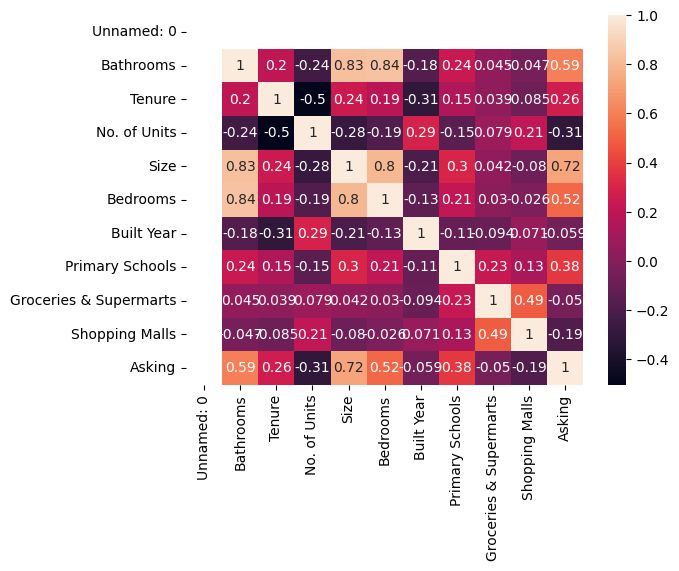

In [86]:
sns.heatmap(df_srx.corr(), annot=True)

In [87]:
df_srx.describe()

,Unnamed: 0,Bathrooms,Tenure,No. of Units,Size,Bedrooms,Built Year,Primary Schools,Groceries & Supermarts,Shopping Malls,Asking
count,0.0,3886.000000,3886.000000,3666.000000,3886.000000,3886.000000,3886.000000,3886.000000,3886.000000,3886.000000,3886.000000
mean,NaN,2.183222,393.325013,489.288052,1166.684508,2.416624,2008.103963,0.686140,0.543055,0.712241,7026.283854
std,NaN,1.119334,422.012120,319.451558,944.949019,1.174864,10.269070,0.368735,0.295054,0.448385,6277.091652
min,NaN,1.000000,99.000000,11.000000,1.000000,1.000000,1920.000000,0.060000,0.000000,0.000000,1000.000000
25%,NaN,1.000000,99.000000,231.000000,570.250000,1.000000,2000.000000,0.430000,0.320000,0.360000,3961.666667
50%,NaN,2.000000,99.000000,448.000000,969.000000,2.000000,2010.000000,0.620000,0.500000,0.620000,5233.333333
75%,NaN,3.000000,999.000000,696.000000,1442.750000,3.000000,2016.000000,0.840000,0.700000,0.950000,7612.437500
max,NaN,7.000000,999.000000,1715.000000,8514.000000,6.000000,2022.000000,1.890000,1.930000,1.980000,69000.000000


In [88]:
df_srx.drop([ 'Model', 'Property Type'], axis=1, inplace=True)

# Split dataframe into HDB and Condo

In [91]:
df_srx_condo

,Property Name,Bathrooms,Tenure,No. of Units,District,Lease Term,Room Type,Address,Size,Date Listed,Bedrooms,Developer,Built Year,Primary Schools,Groceries & Supermarts,Shopping Malls,Trains (MRT & LRT),Property,Asking,Neighborhood
0,JadeScape,1.0,99,1206.0,D20,Flexible,Entire Unit,8 Shunfu Road (575745),646,2023-01-30 22:08:56,2.0,Qingjian Realty (Marymount) Pte Ltd,2022,0.60,0.44,0.79,"MARYMOUNT MRT,CC16",Condominium,5750.0,Big
1,JadeScape,2.0,99,1206.0,D20,Flexible,Entire Unit,8 Shunfu Road (575745),1055,2023-04-01 14:30:22,3.0,Qingjian Realty (Marymount) Pte Ltd,2022,0.60,0.44,0.79,"MARYMOUNT MRT,CC16",Condominium,5750.0,Big
2,JadeScape,2.0,99,1206.0,D20,Flexible,Entire Unit,8 Shunfu Road (575745),764,2022-12-23 23:57:59,2.0,Qingjian Realty (Marymount) Pte Ltd,2022,0.60,0.44,0.79,"MARYMOUNT MRT,CC16",Condominium,5750.0,Big
3,JadeScape,1.0,99,1206.0,D20,2+ years,Entire Unit,8 Shunfu Road (575745),646,2023-02-07 11:33:19,2.0,Qingjian Realty (Marymount) Pte Ltd,2022,0.60,0.44,0.79,"MARYMOUNT MRT,CC16",Condominium,5750.0,Big
4,JadeScape,2.0,99,1206.0,D20,Flexible,Entire Unit,8 Shunfu Road (575745),1015,2023-01-29 10:23:55,4.0,Qingjian Realty (Marymount) Pte Ltd,2022,0.60,0.44,0.79,"MARYMOUNT MRT,CC16",Condominium,5750.0,Big
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3881,Parc Rosewood,1.0,99,689.0,D25,Flexible,Entire Unit,81 Rosewood Drive (737788),431,2023-03-17 10:21:24,1.0,Kensington Land Pte Ltd,2014,0.45,0.49,0.86,"WOODLANDS SOUTH MRT,TE3",Condominium,3000.0,Big
3882,Dover Parkview,3.0,99,686.0,D5,2+ years,Entire Unit,32 Dover Rise (138686),936,2023-01-29 22:52:51,2.0,Dover Palisades Pte Ltd (Far East Organization),1997,0.66,0.23,0.56,"BUONA VISTA MRT,CC22",Condominium,5000.0,Big
3883,Shelford Suites,3.0,999,77.0,D11,Flexible,Entire Unit,Shelford Road,1292,2023-03-14 00:31:03,3.0,City Developments Ltd,2011,0.76,0.42,0.43,"BOTANIC GARDENS MRT,CC19",Condominium,6800.0,Small
3884,The Laurels,2.0,999,229.0,D9,Flexible,Entire Unit,38 Cairnhill Road (229658),882,2023-03-19 21:47:38,2.0,Sing Holdings (Cairnhill) Pte Ltd,2013,0.64,0.14,0.14,"SOMERSET MRT,NS23",Condominium,7000.0,Small


In [92]:
df_srx_condo.columns

Index(['Property Name', 'Bathrooms', 'Tenure', 'No. of Units', 'District',
       'Lease Term', 'Room Type', 'Address', 'Size', 'Date Listed', 'Bedrooms',
       'Developer', 'Built Year', 'Primary Schools', 'Groceries & Supermarts',
       'Shopping Malls', 'Trains (MRT & LRT)', 'Property', 'Asking',
       'Neighborhood'],
      dtype='object')

In [104]:
#Condo
df_srx_condo = df_srx[df_srx['Property'] == 'Condominium']
df_srx_condo = df_srx_condo[df_srx['Developer'].notna()]
df_srx_condo.isnull().sum()
df_srx_condo = df_srx_condo.drop(['Unnamed: 0'], axis=1)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
import joblib

ct = ColumnTransformer([('minmax', MinMaxScaler(), ['Bathrooms', 'No. of Units', 
 'Size', 'Bedrooms','Primary Schools', 'Groceries & Supermarts',
       'Shopping Malls'])
                       ],
                       remainder='passthrough')

ct.fit(df_srx_condo)
joblib.dump(ct, 'Price Data Preprocess.sav')

df_srx_condo_preprocessed = pd.DataFrame(ct.transform(df_srx_condo), columns = ct.get_feature_names_out())


In [114]:
df_srx_condo_preprocessed.columns = [col.replace('minmax__','') for col in df_srx_condo_preprocessed.columns]
df_srx_condo_preprocessed.columns = [col.replace('remainder__','') for col in df_srx_condo_preprocessed.columns]

In [116]:
df_srx_condo_preprocessed.to_csv("df_srx_Condo.csv")